In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [12]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y= true_fun(X) + np.random.randn(n_samples) * 0.1 


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.40772896250986845입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.0432087498723184입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08]입니다.
Degree 15 MSE는 182581084.8263125입니다.


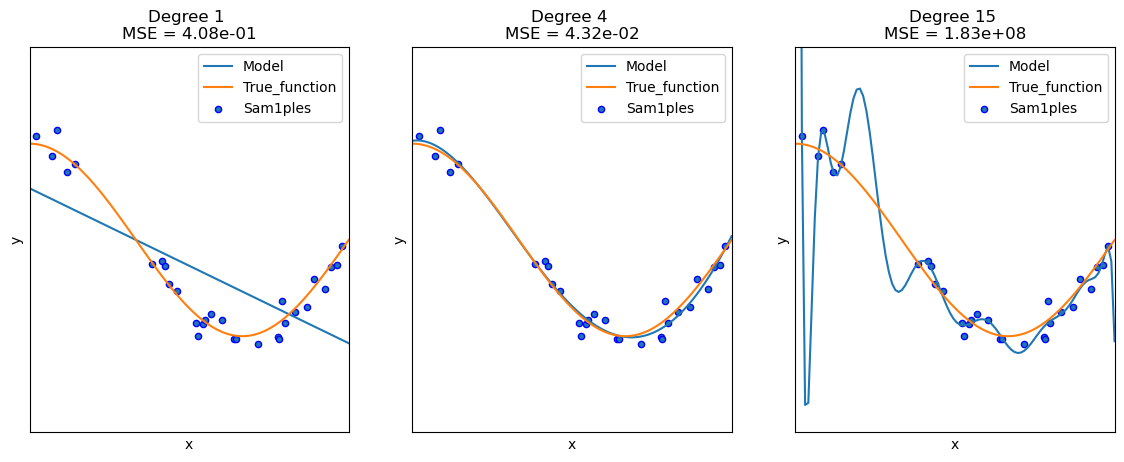

In [21]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("Polynomial_Features", polynomial_features), ("linear_regression", linear_regression)])

    pipeline.fit(X.reshape(-1,1), y)

    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))

    X_test = np.linspace(0,1,100)

    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")

    plt.plot(X_test, true_fun(X_test), '-', label = 'True_function')
    plt.scatter(X,y, edgecolors='b', s=20, label='Sam1ples')

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title("Degree {} \nMSE = {:.2e}".format(degrees[i], -scores.mean(), scores.std()))


plt.show()


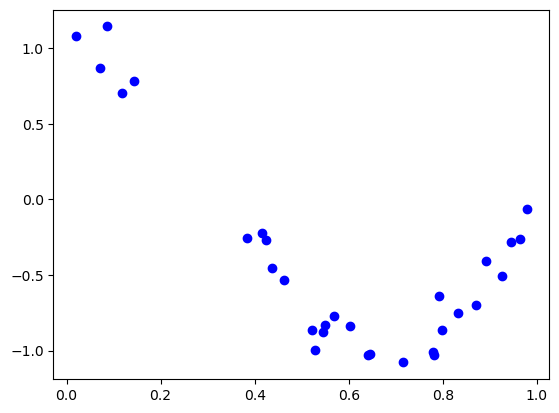

: 

In [22]:
plt.plot(X, y, 'bo')
# plt.plot()
plt.show()